# 문제 1
- 동전 뒤집기
- https://www.acmicpc.net/problem/1285

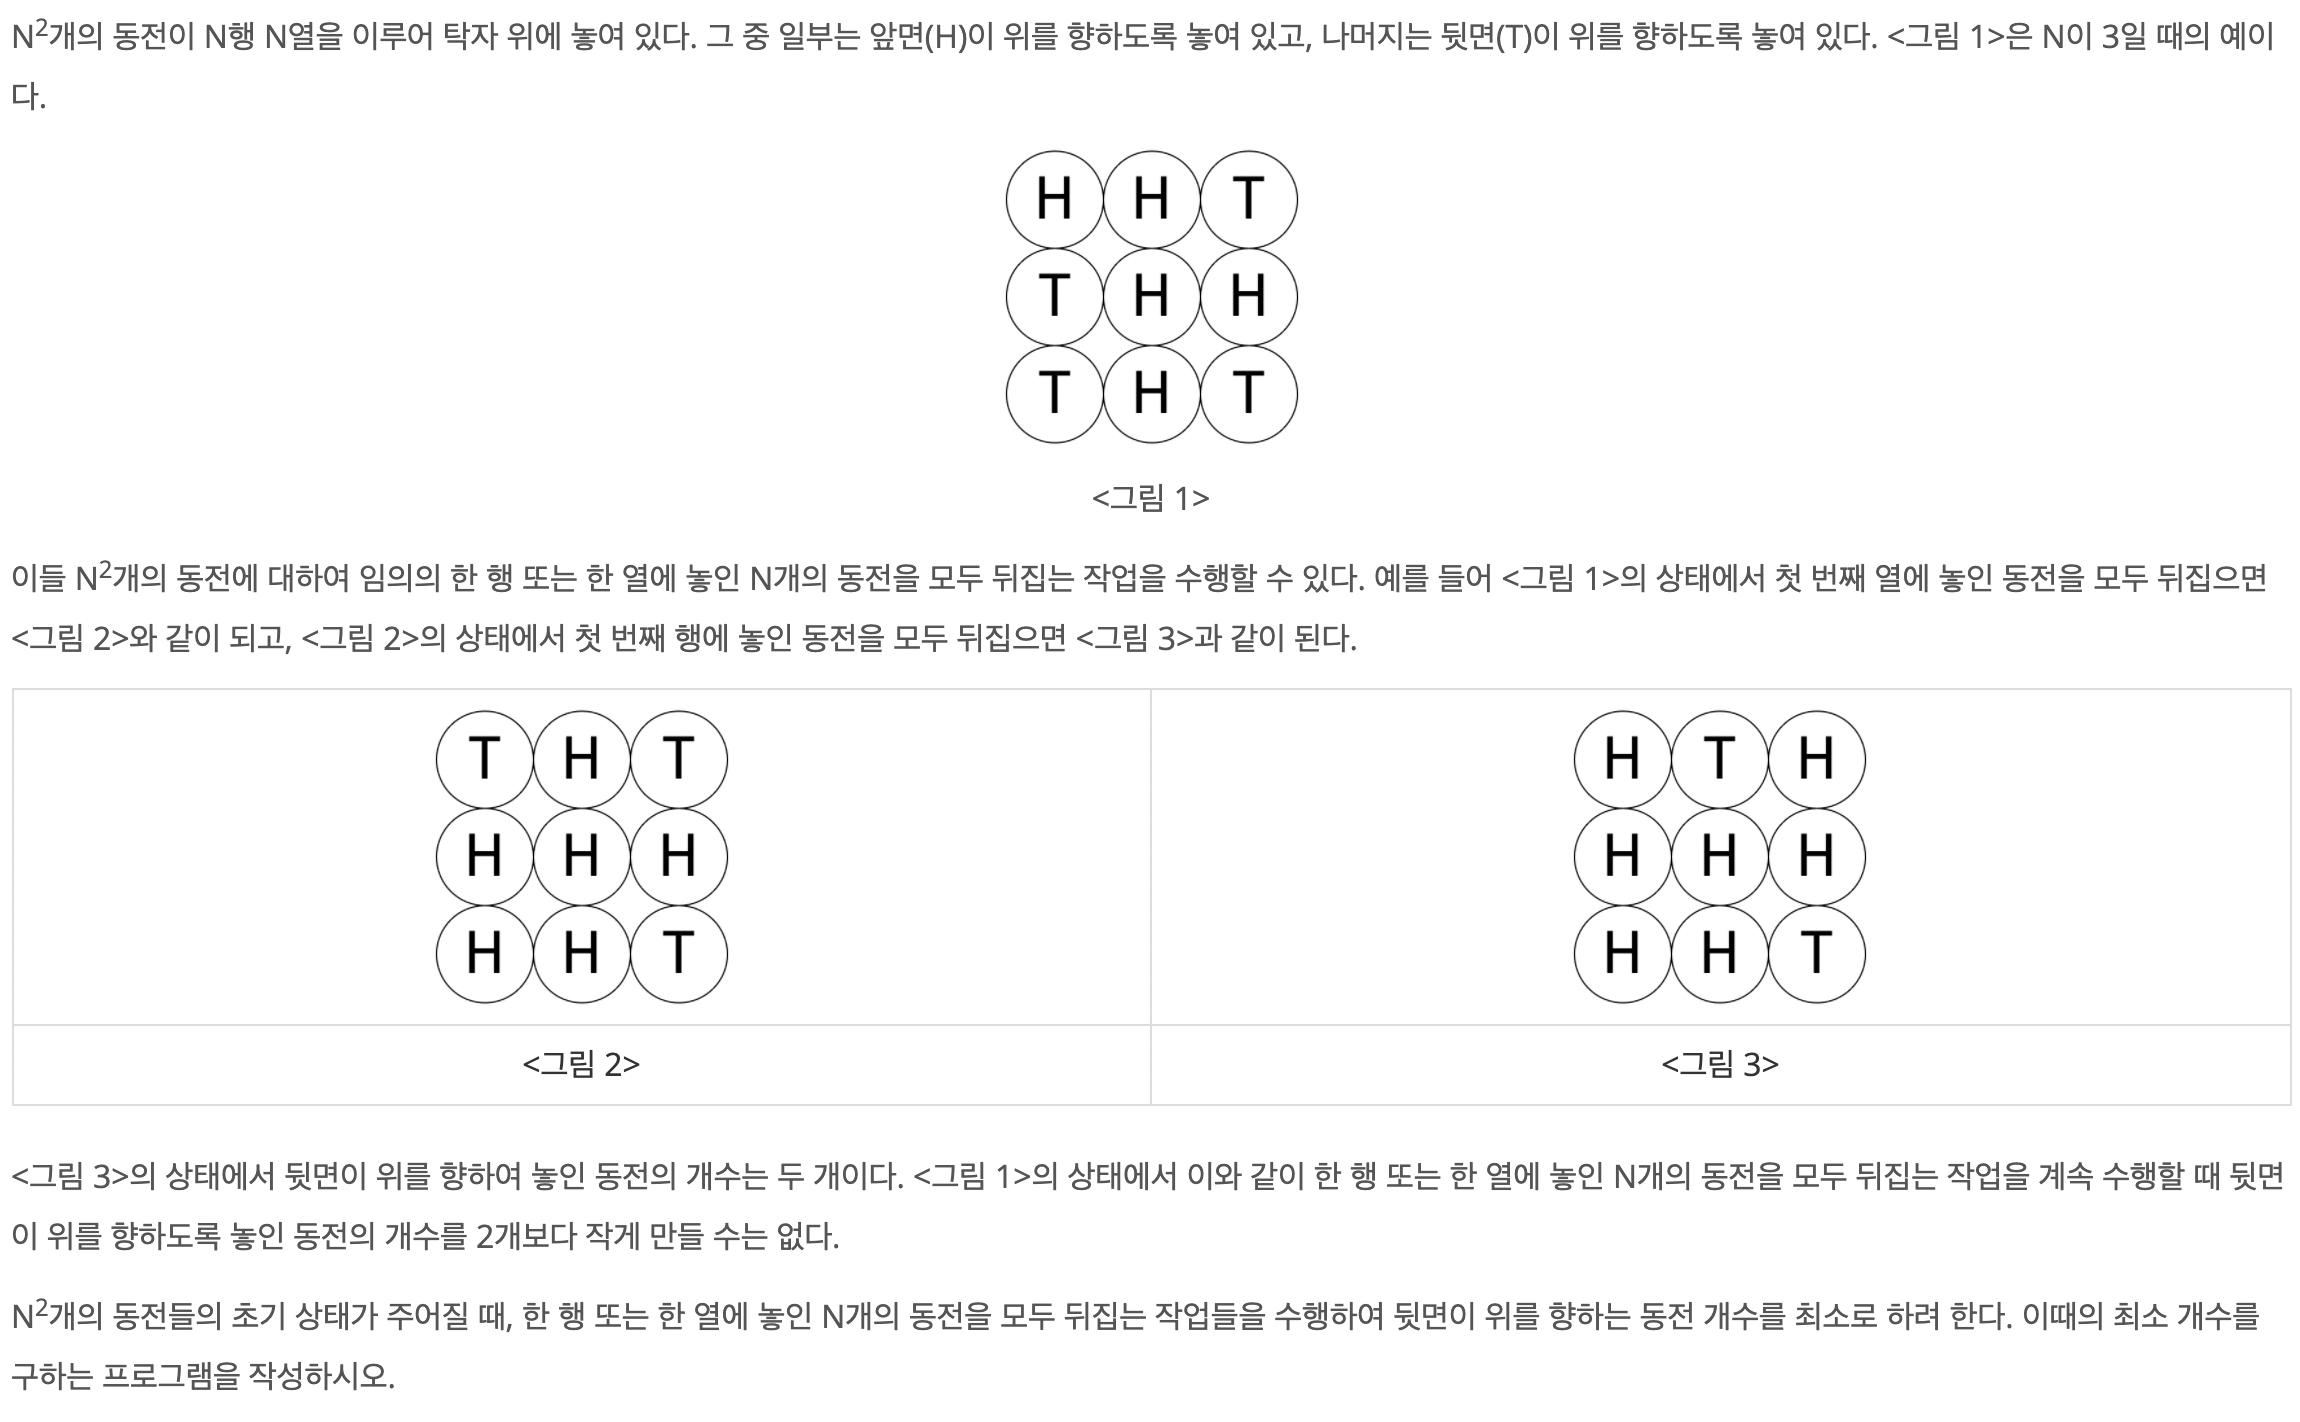

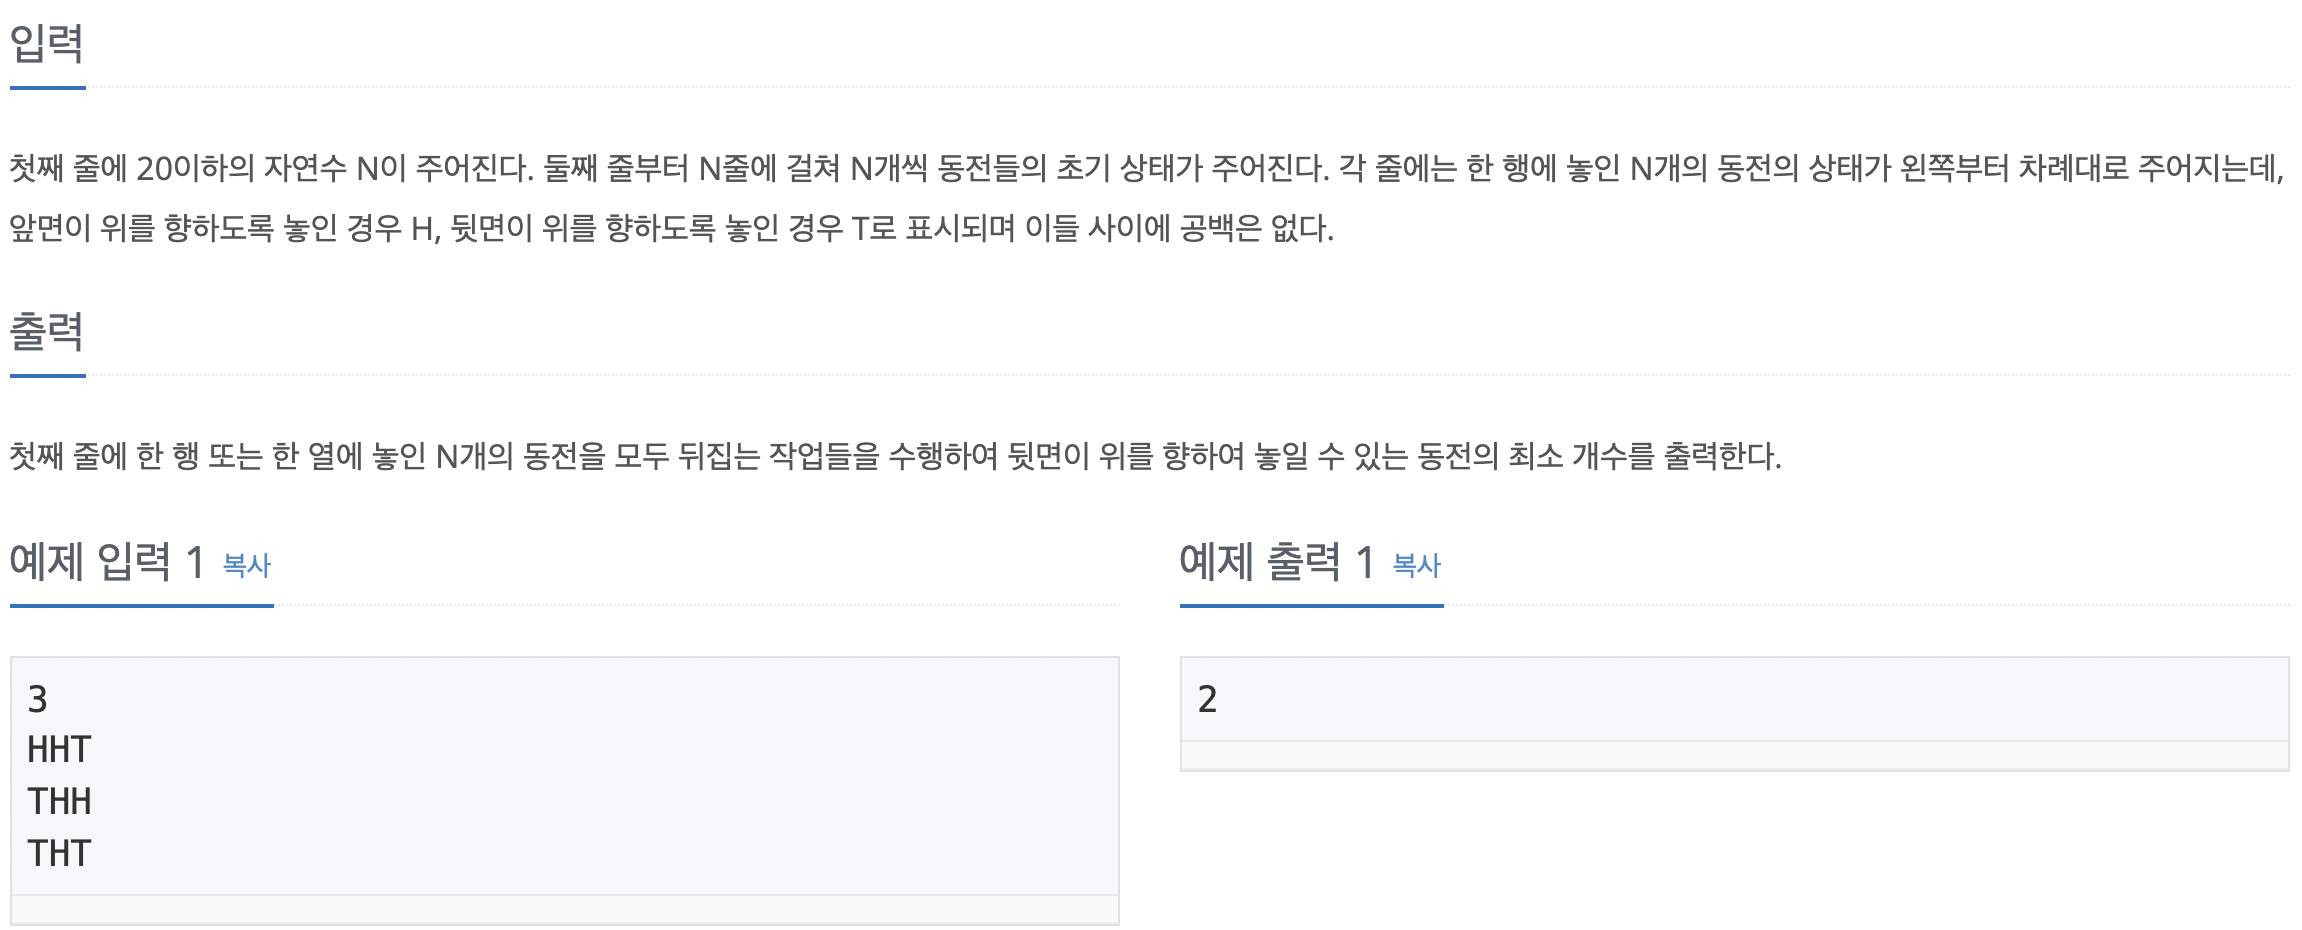

## 시도해볼 step
- H : 0, T : 1 로 변경하고, 최종적으로 sum을 이용하자
- 현재 행과 열중 가장 많은 T를 보유한 행 혹은 열을 뒤집자
- 가장 많은 T가 1개이면 뒤집는 행동을 멈춘다
    - ```최소개수가 0이 아니면 분명 더 최소한으로 만드는 방법이 존재한다```
        - 이 부분 추가적으로 시도해봐야 함 (0207 예정)
    
    - 일렬로 나열했을때, N으로 나눈 (몫,나머지)로 각각의 위치를 정해줄 수 있다.
        - 인덱스를 바탕으로 한 줄로 인식하여 sum을 구한다.
    


In [71]:
N = int(input())

coin = ""
for _ in range(N):
    coin += input()

tmp = []
for c in coin:
    if c == 'H':
        tmp.append(0)
    else:
        tmp.append(1)

while True:
    max_idx = 0
    max_cnt = 0
    for r in range(N):   # 열 기준 최대 합
        cnt = 0
        for i in range(len(tmp)):
            if i%N == r:
                cnt += tmp[i]
        #print(cnt)

        if cnt > max_cnt:
            max_cnt = cnt
            max_idx = r+N

    for q in range(N):   # 행 기준 최대 합
        cnt = 0
        for i in range(len(tmp)):
            if i//N == q:
                cnt += tmp[i]
        #print(cnt)

        if cnt > max_cnt:
            max_cnt = cnt
            max_idx = q

    #print(max_cnt, max_idx)

    if max_cnt <= 1:
        answer = sum(tmp)
        print(answer)
        break

    else:
        if max_idx < N:
            for i in range(len(tmp)):
                if i // N == max_idx:
                    tmp[i] = 1-tmp[i]   # 0은 1로, 1은 0으로
        else:
            for i in range(len(tmp)):
                if i % N == max_idx - N:
                    tmp[i] = 1-tmp[i]   # 0은 1로, 1은 0으로

3
HHT
THH
THT
2


- 정답 코드
- https://sujeng97.tistory.com/20

In [72]:
n = int(input())
coin = [list(input()) for _ in range(n)]
ans = n * n + 1

for bit in range(1 << n):
    tmp = [coin[i][:] for i in range(n)] # [:]은 필요없음
    for i in range(n):
        if bit & (1 << i):
            for j in range(n):
                if tmp[i][j] == 'H':
                    tmp[i][j] = 'T'
                else:
                    tmp[i][j] = 'H'

    tot = 0
    for i in range(n):
        cnt = 0
        for j in range(n):
            if tmp[j][i] == 'T':
                cnt += 1
        tot += min(cnt, n-cnt)
    ans = min(ans, tot)

print(ans)

3
HHT
THH
THT
2


## "<<"에 대해 공부하기
- a << b : a를 b만큼 왼쪽 쉬프트
    - a : 001(1)
    - a << 2 : 100(4)

In [79]:
range(1 << 3)

range(0, 8)

In [73]:
for bit in range(1 << n):
    print(bit)

0
1
2
3
4
5
6
7


# 문제 2 (기존 풀었던 문제)
- 회의실 배정
- https://www.acmicpc.net/problem/1931

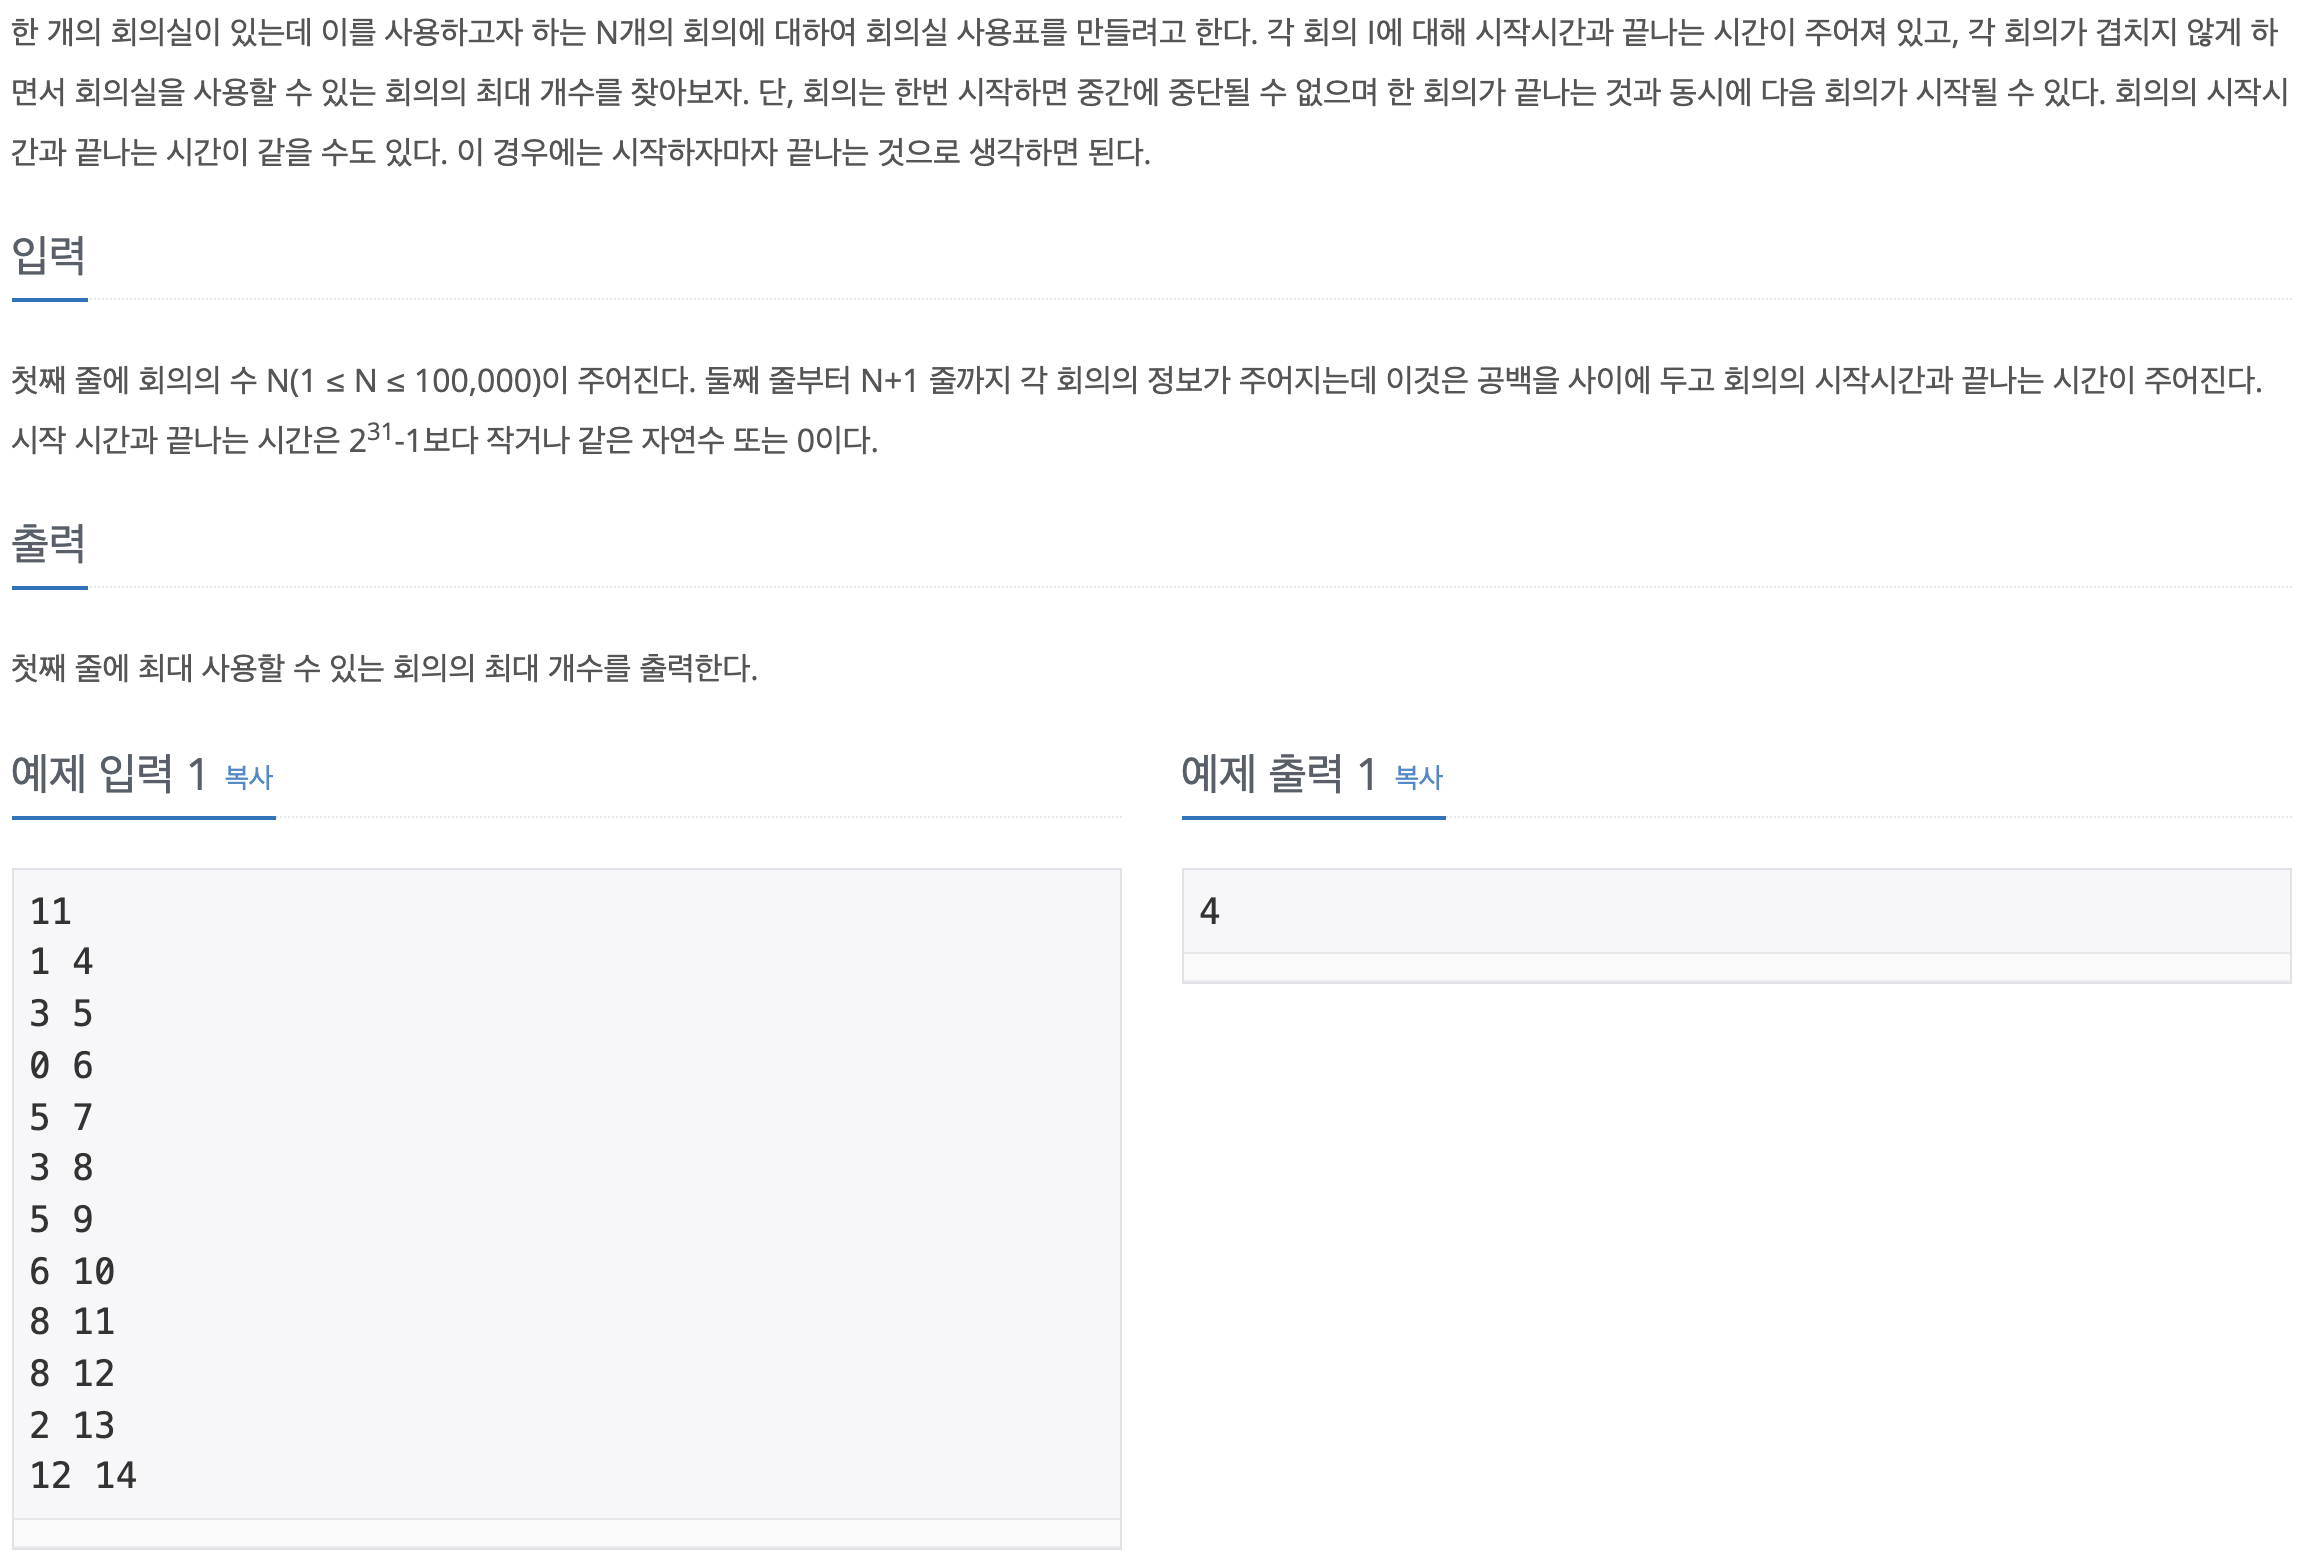

- 끝에서부터 회의를 채운다는 느낌으로 접근
- 마감시간으로 부터 가까운 회의부터 채워 넣는다

In [96]:
meet_list = []
for i in range(int(input())):
    a,b = input().split(' ')
    a = int(a); b = int(b)
    meet_list.append([a,b])
    
meet_list.sort(key = lambda x : (x[1],x[0]))
answer = 0
final_end = 0
for start, end in meet_list:
    if start >= final_end:
        final_end = end
        answer += 1
print(answer)

dd


ValueError: invalid literal for int() with base 10: 'dd'

# 문제 3
- AB
- https://www.acmicpc.net/problem/12970

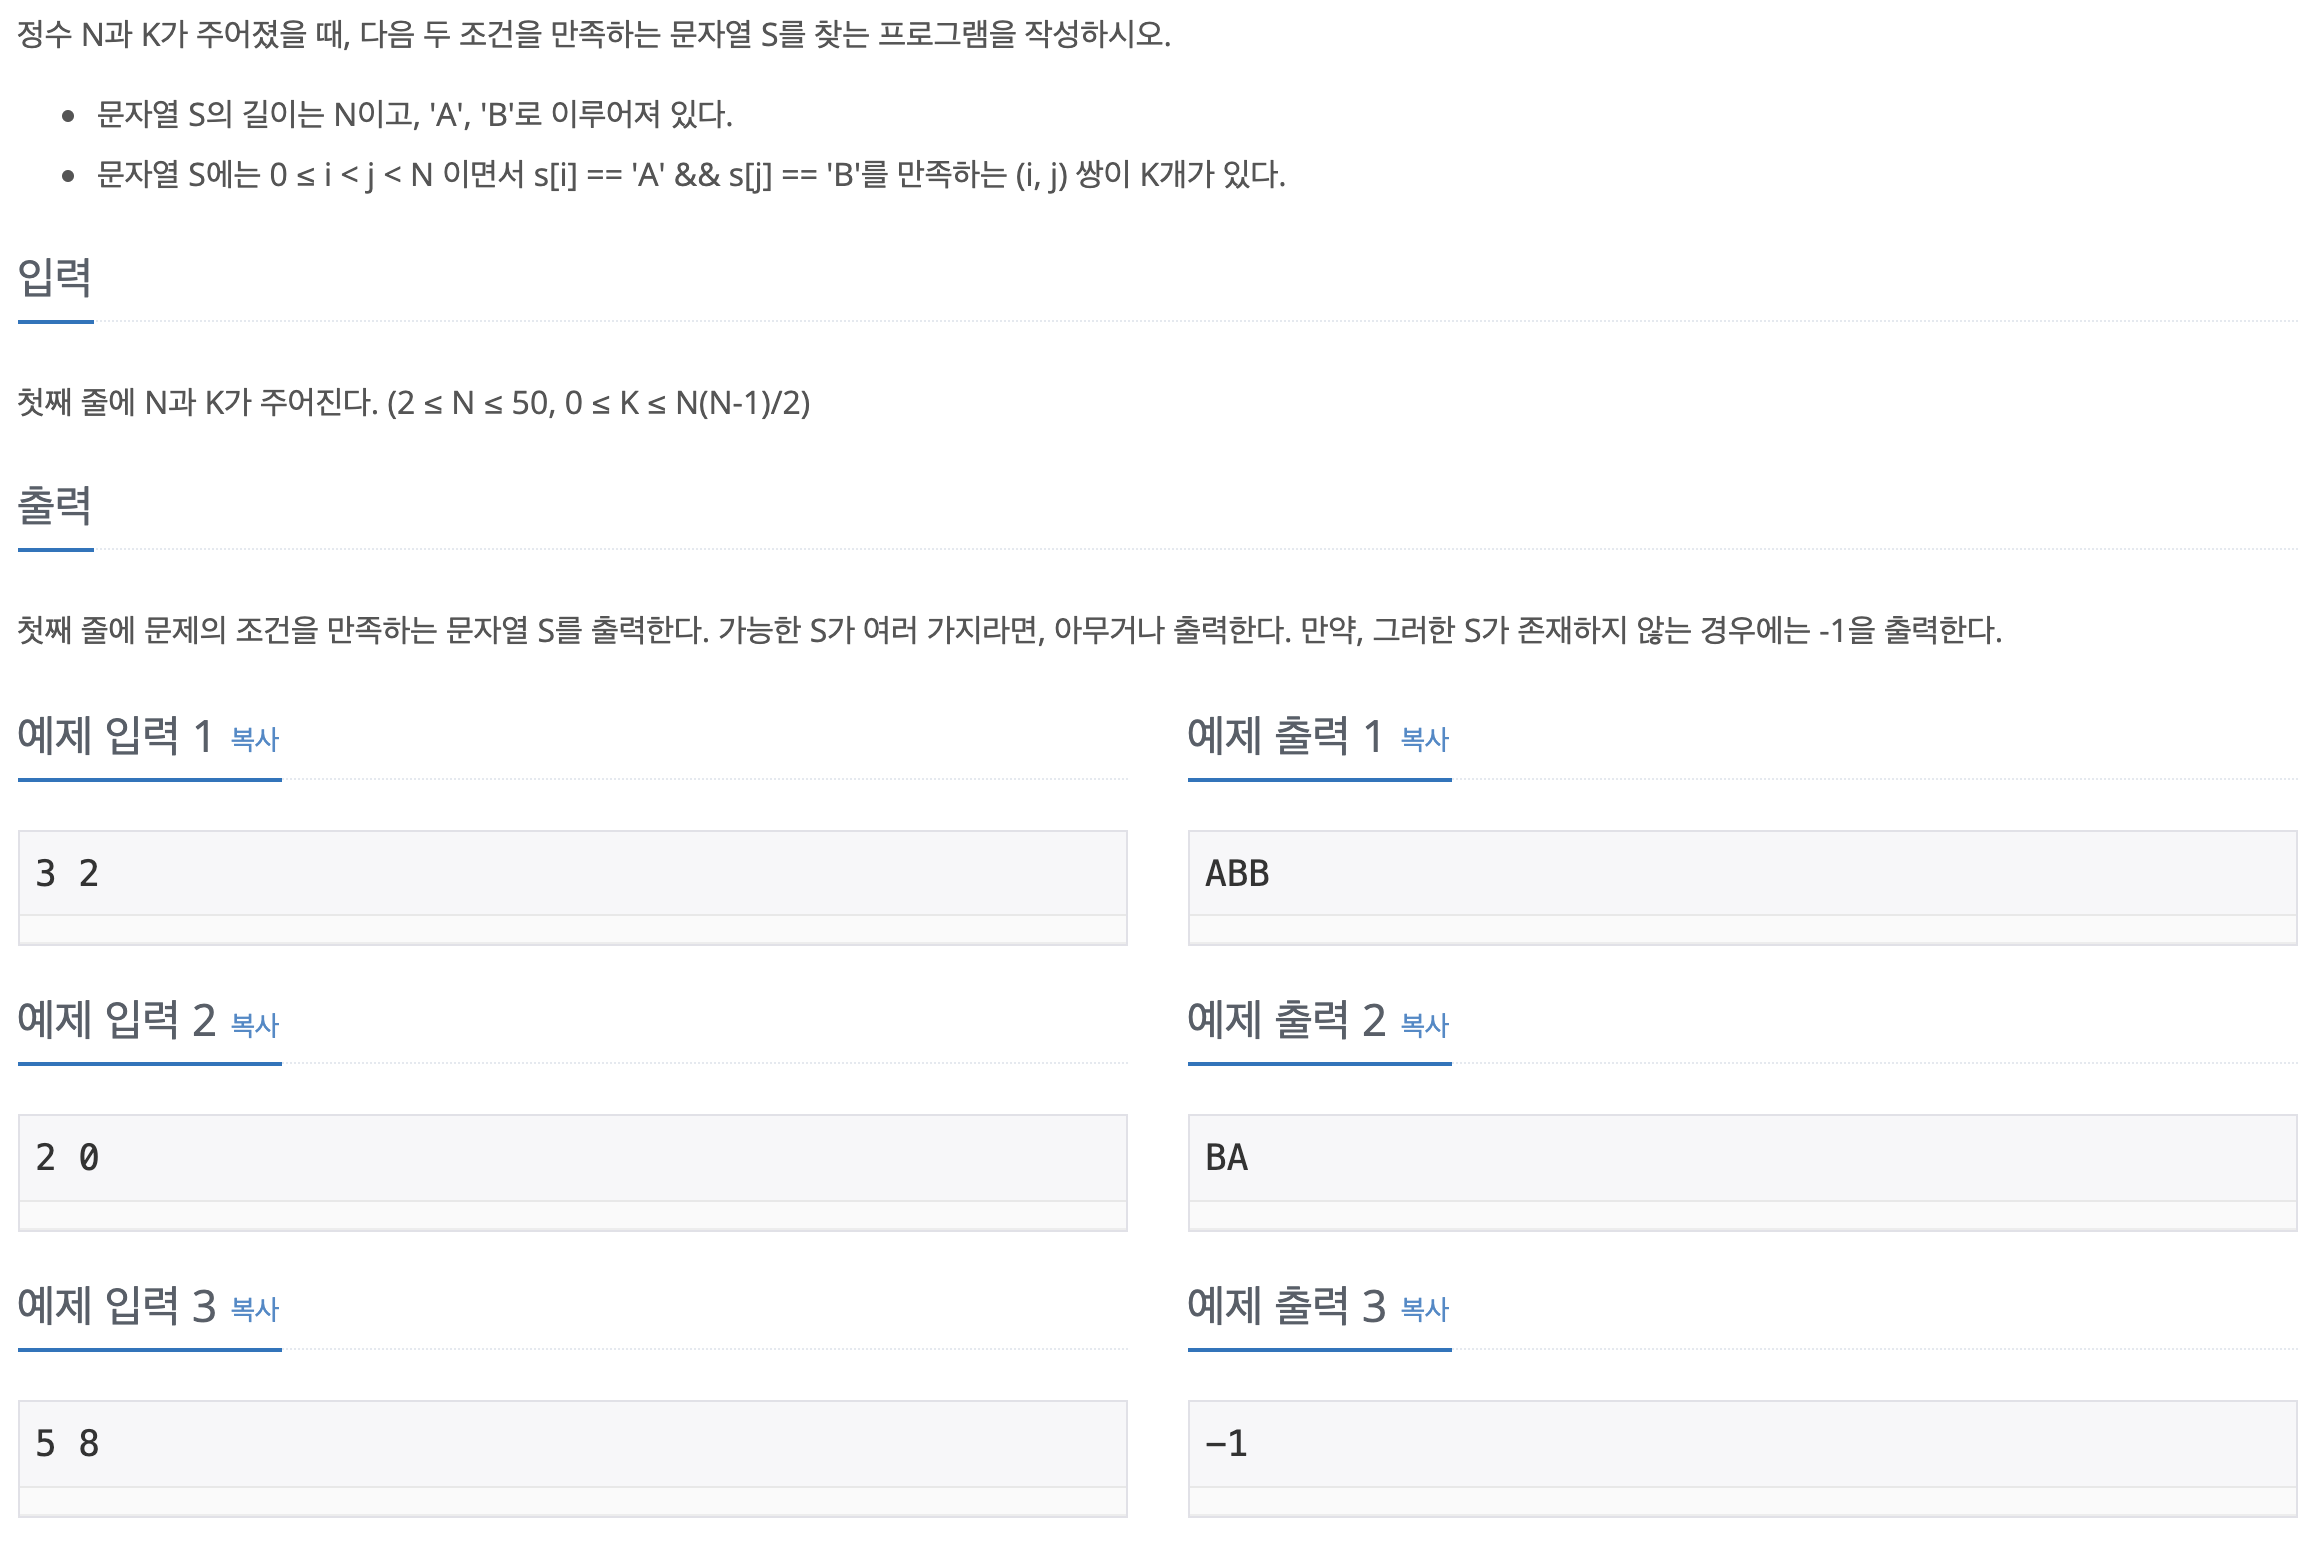

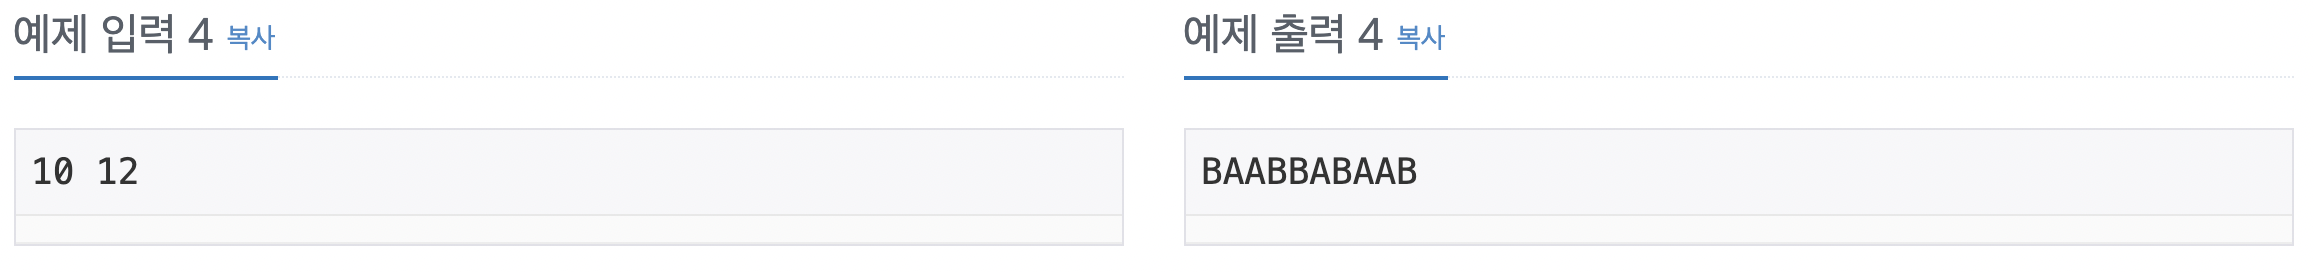

## 문제풀이 step
- N과 K의 대소를 비교한다
    - N >= K 일경우, A를 가장 왼쪽에 배치하고, K만큼 B를 이어 붙인다.
    - N < K 일경우, A를 가장 왼쪽에 배치하고, 부족한 쌍의 수에 맞추어 A를 적절한 위치에 넣어준다
        - ex) N = 10, K = 12
        - 1. ABBBBBBBBB
        - 2. ABBBBBBABB

In [170]:
N,K = map(int,(input().split()))

if N > K:
    ans = 1*'A' + K*'B' + (N-1-K)*'A'
    print(ans)
    #print('check1')
    
else:
    if (N == K) & (N%2 == 0):
        print(-1)
        #print('check2')
    else:
        A_cnt = 1
        tmp = 1*'A' + (N-1)*'B'           # 우선 가장 왼쪽에 A 고정해두기
        remain = K-(N-1)                  # 남은 쌍은 총 K - (N-1)개
        limit = (A_cnt+1)*(N-(A_cnt+1))   # 문자열 하나 추가하여 가장 많은 K쌍을 만들수 있는 수
        while remain:
            if K > limit:
                tmp = tmp[:A_cnt] + 'A' + tmp[-1*(N-A_cnt-1):]
                
                remain -= N-2*A_cnt-1
                A_cnt += 1
                limit = (A_cnt+1)*(N-(A_cnt+1))
                #print('check3')
                #print(tmp)
                #print(remain)
                if len(tmp) != N:
                    print(-1)
                    break
                continue
                
            else:
                need = remain + A_cnt
                if need > (N-A_cnt-1):
                    print(-1)
                    break
                    
                tmp = tmp[:-(need+1)] + 'A' + tmp[-(need):]
                # tmp = tmp[:-(remain+2)] + 'A' + tmp[-(remain+1):]
                if len(tmp) != N:
                    print(-1)
                    #print('check4')
                    break
                else:
                    print(tmp)
                    #print('check5')
                    break

            if remain < 0:
                print(-1)
                #print('check6')
                break

10 18
AABBBABBBB


- 60% 정도에서 실패..

- 정답 코드
- https://lastwinter.tistory.com/33

In [171]:
n , k = map(int,input().split())

def check(word):
    cnt = 0
    for i in range(len(word)-1):
        if word[i] == 'A':
            for j in range(i+1,len(word)):
                if word[j] == 'B':
                    cnt += 1
    return cnt

a = 'B'*n
a = list(a)
for i in range(n):
    a[i] = 'A'
    if check(a) == k:
        break
    elif check(a) > k:
        a[i] = 'B'

t = "".join(a)
if t=='B'*n or t=='A'*n:
    if k == 0:
        print(t)
    else:
        print(-1)
else:
    print(t)

10 25
AAAAABBBBB
